# 0. File Preperation 

In [38]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import pearsonr


In [39]:
# Define the font properties
#font = {'family': 'sans-serif',
       # 'size': 14}

# Apply the font settings globally for Matplotlib
#plt.rc('font', **font)

# Apply the font settings globally for Seaborn
#sns.set_context("notebook", rc={"font.family": font['family'], "font.size": font['size']})


In [40]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [41]:
# Importing Data
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [42]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

In [43]:
# Combining data in one dataframe
data= pd.concat([data_hedonic_raw, data_utilitarian_raw])

data_helpful = data[data['helpful_vote'] != 0]


# 1. Outlier Detection and Removal

In [44]:
# Define numerical columns
numerical_columns = ['Rating', 'RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                     'Image', 'VerPur', 'NounR', 'AdjR', 'AdvR', 'FRE']

In [45]:
# Test for normality using Shapiro-Wilk test
normality_tests = {}

for col in numerical_columns:
    shapiro_test = stats.shapiro(data[col])
    shapiro_statistic = shapiro_test.statistic
    shapiro_pvalue = shapiro_test.pvalue
    
    normality_tests[col] = {
        'Shapiro-Wilk': {'Statistic': shapiro_statistic, 'p-value': shapiro_pvalue}
    }

# Print normality test results
for col, test_results in normality_tests.items():
    print(f"--- {col} ---")
    print(f"Shapiro-Wilk Test: Statistic={test_results['Shapiro-Wilk']['Statistic']:.4f}, p-value={test_results['Shapiro-Wilk']['p-value']:.4f}")
    print("\n")


--- Rating ---
Shapiro-Wilk Test: Statistic=0.6496, p-value=0.0000


--- RewExt ---
Shapiro-Wilk Test: Statistic=0.6913, p-value=0.0000


--- Sentiment ---
Shapiro-Wilk Test: Statistic=0.6217, p-value=0.0000


--- Subjective ---
Shapiro-Wilk Test: Statistic=0.8290, p-value=0.0000


--- WordC ---
Shapiro-Wilk Test: Statistic=0.5423, p-value=0.0000


--- SentC ---
Shapiro-Wilk Test: Statistic=0.6300, p-value=0.0000


--- SentL ---
Shapiro-Wilk Test: Statistic=0.7306, p-value=0.0000


--- TitleL ---
Shapiro-Wilk Test: Statistic=0.2992, p-value=0.0000


--- ElapDays ---
Shapiro-Wilk Test: Statistic=0.9461, p-value=0.0000


--- Image ---
Shapiro-Wilk Test: Statistic=0.1563, p-value=0.0000


--- VerPur ---
Shapiro-Wilk Test: Statistic=0.2452, p-value=0.0000


--- NounR ---
Shapiro-Wilk Test: Statistic=0.8860, p-value=0.0000


--- AdjR ---
Shapiro-Wilk Test: Statistic=0.8690, p-value=0.0000


--- AdvR ---
Shapiro-Wilk Test: Statistic=0.8007, p-value=0.0000


--- FRE ---
Shapiro-Wilk Test: Sta

In [46]:
from sklearn.ensemble import IsolationForest

# Define numerical columns of interest
numerical_columns = ['Rating', 'RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                      'NounR', 'AdjR', 'AdvR', 'FRE']

# Initialize Isolation Forest
clf = IsolationForest(contamination=0.09)

# Fit Isolation Forest on numerical columns
outlier_preds = clf.fit_predict(data_hedonic_raw[numerical_columns])

# Identify outliers
outliers = data_hedonic_raw[outlier_preds == -1]
clean_data_hedonic = data_hedonic_raw[outlier_preds == 1]

# Print results
print(f"Number of outliers detected: {len(outliers)}")
print(f"Shape of cleaned data: {clean_data_hedonic.shape}")


Number of outliers detected: 1687
Shape of cleaned data: (17052, 42)


In [10]:
#clean_data_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final_Cleaned.csv', index=False)

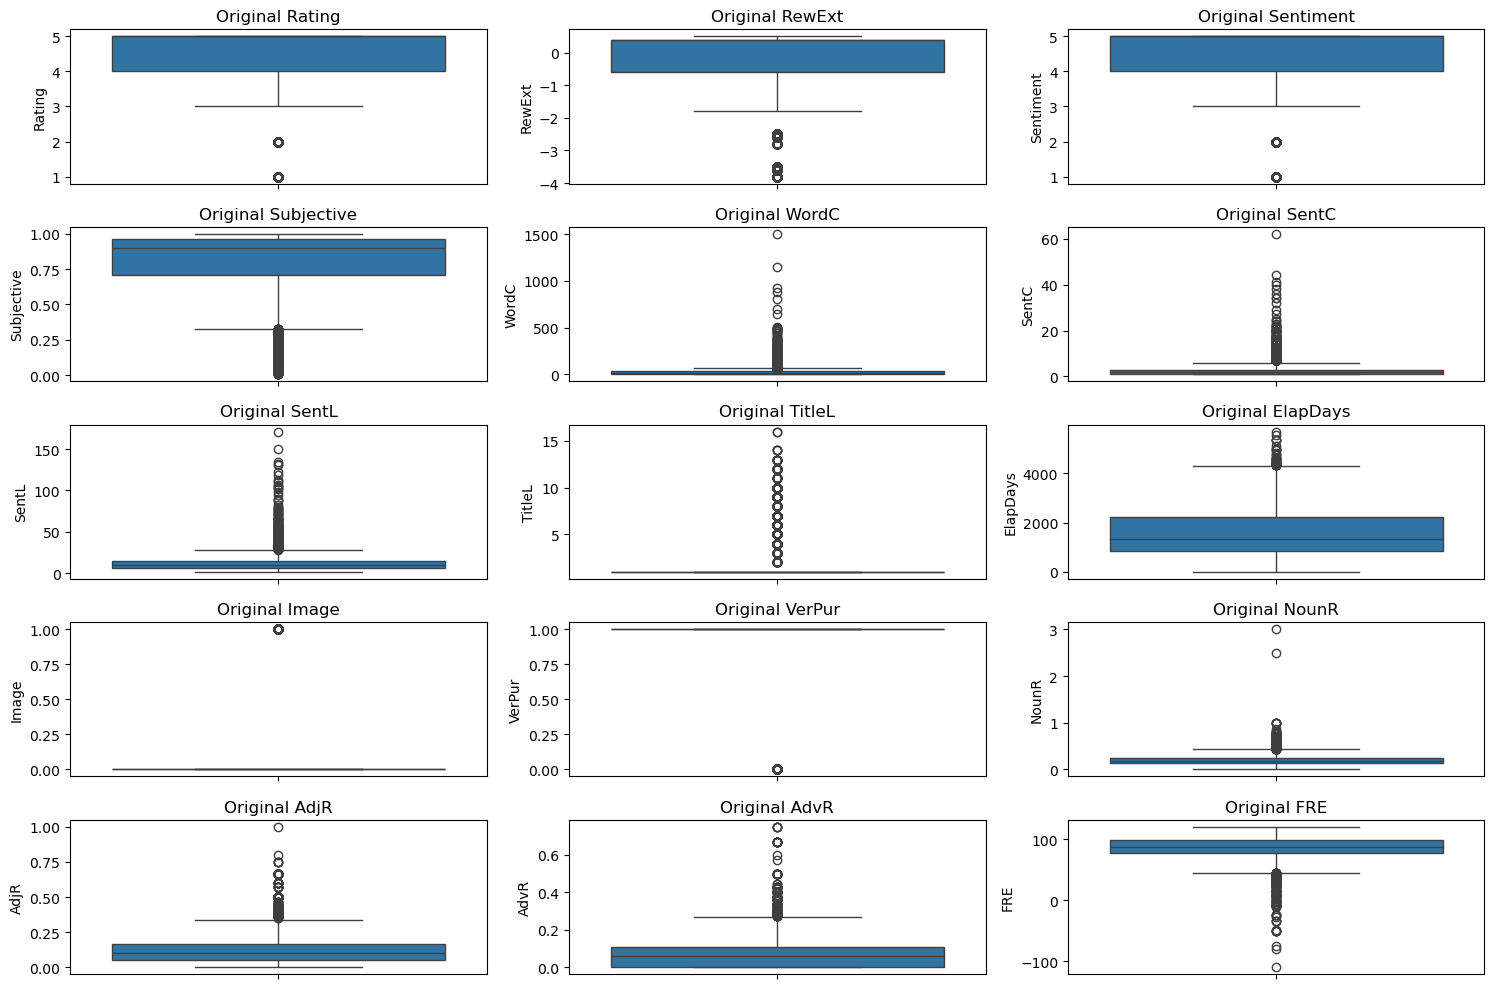

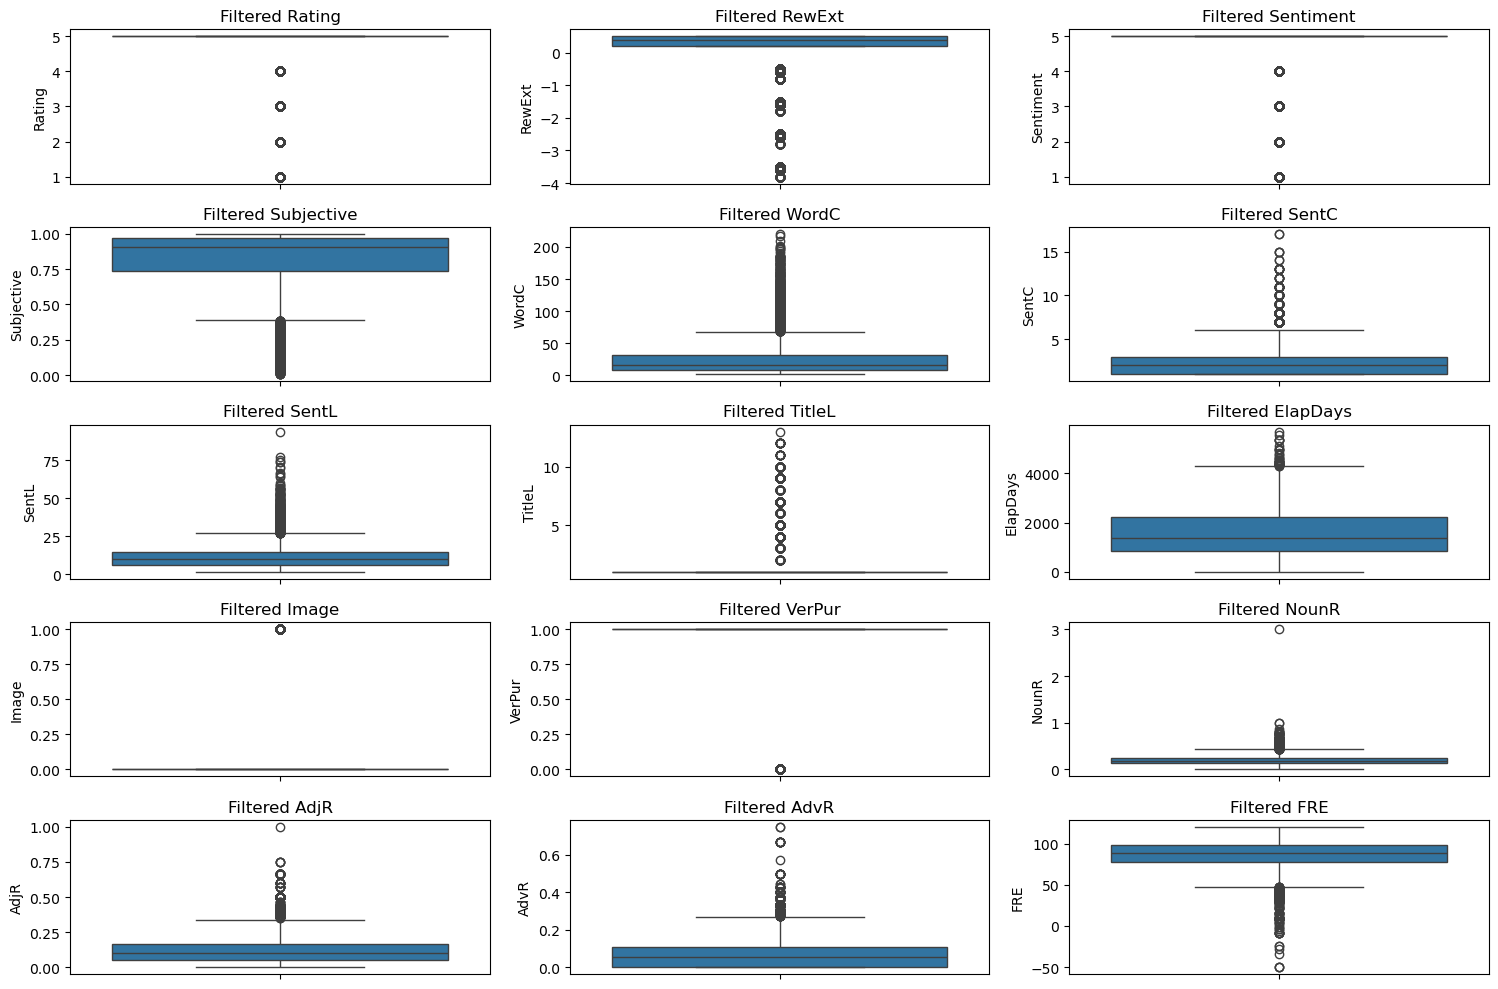

In [48]:
numerical_columns = ['Rating', 'RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                     'Image', 'VerPur', 'NounR', 'AdjR', 'AdvR', 'FRE']

# Plot the original data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=data_hedonic_raw[col])
    plt.title(f'Original {col}')
plt.tight_layout()
plt.show()

# Plot the filtered data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=clean_data_hedonic[col])
    plt.title(f'Filtered {col}')
plt.tight_layout()
plt.show()


In [47]:
from sklearn.ensemble import IsolationForest

# Define numerical columns of interest
numerical_columns = ['Rating', 'RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                      'NounR', 'AdjR', 'AdvR', 'FRE']

# Initialize Isolation Forest
clf = IsolationForest(contamination=0.1)

# Fit Isolation Forest on numerical columns
outlier_preds = clf.fit_predict(data_utilitarian_raw[numerical_columns])

# Identify outliers
outliers = data_utilitarian_raw[outlier_preds == -1]
clean_data_utilitarian = data_utilitarian_raw[outlier_preds == 1]

# Print results
print(f"Number of outliers detected: {len(outliers)}")
print(f"Shape of cleaned data: {clean_data_utilitarian.shape}")


Number of outliers detected: 1830
Shape of cleaned data: (16471, 42)


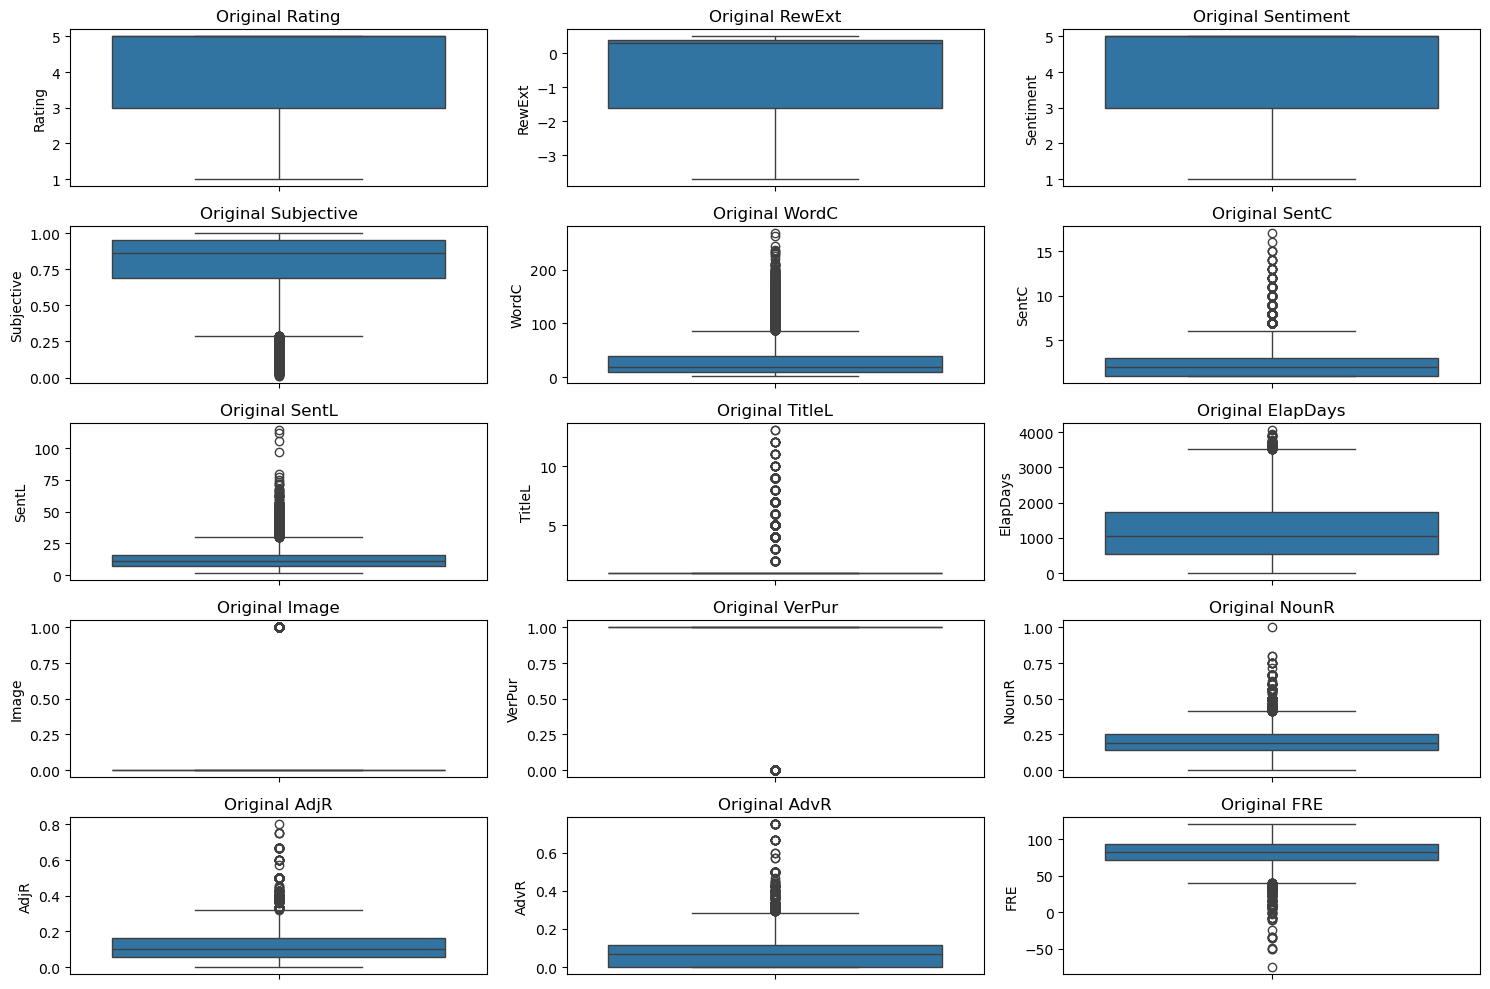

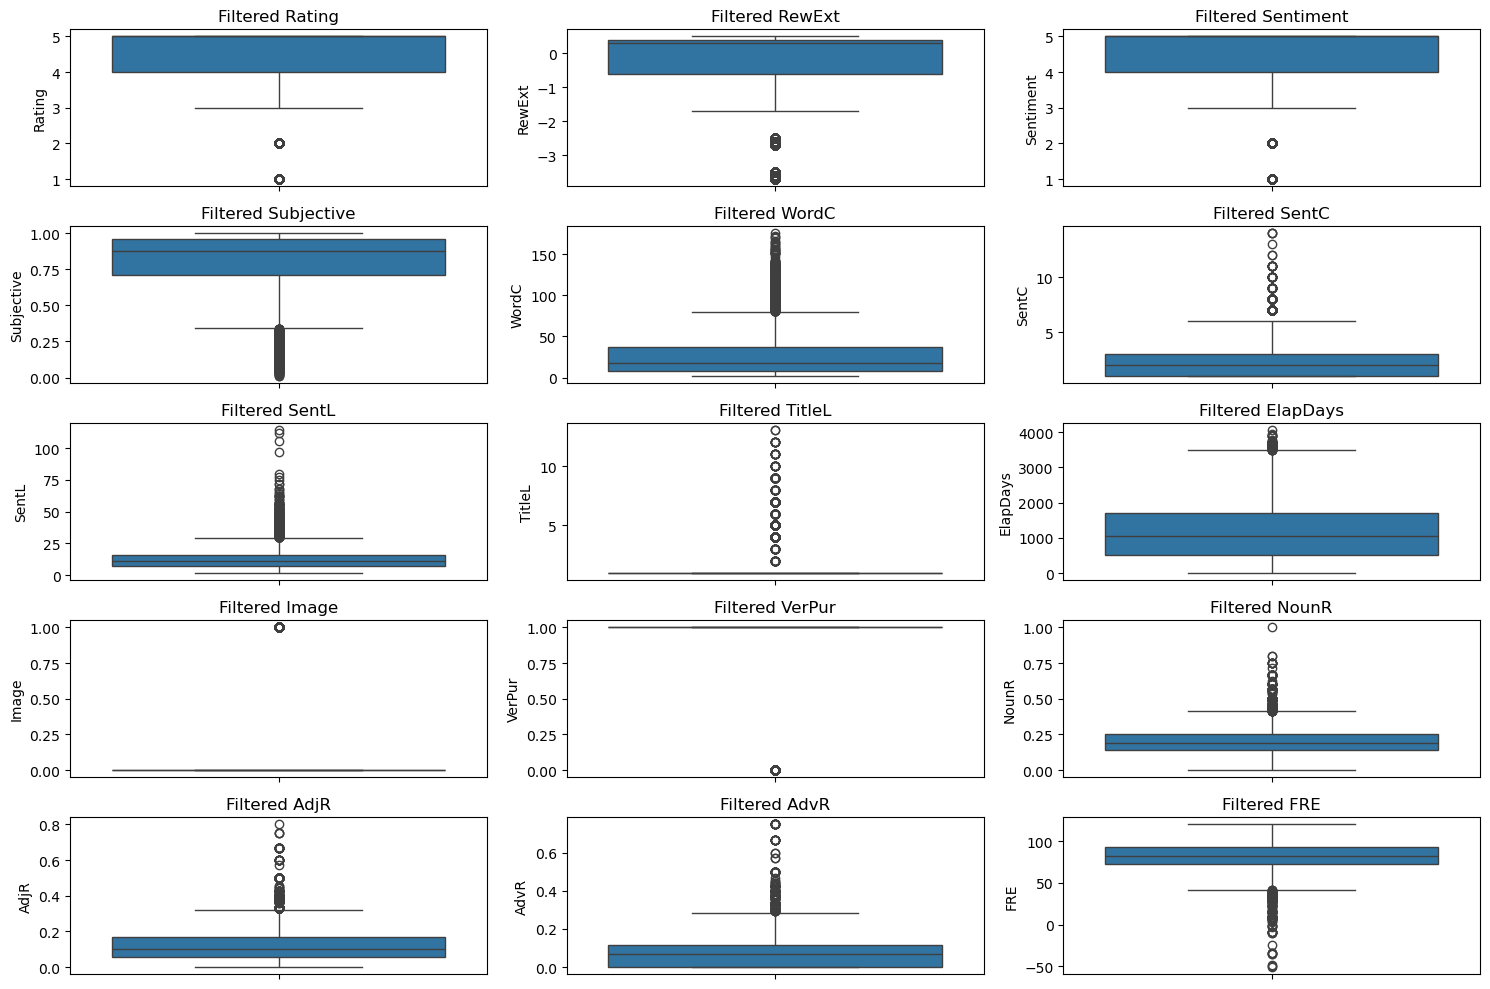

In [13]:
# Define numerical columns
numerical_columns = ['Rating', 'RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                     'Image', 'VerPur', 'NounR', 'AdjR', 'AdvR', 'FRE']


# Plot the original data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=data_utilitarian_raw[col])
    plt.title(f'Original {col}')
plt.tight_layout()
plt.show()

# Plot the filtered data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=clean_data_utilitarian[col])
    plt.title(f'Filtered {col}')
plt.tight_layout()
plt.show()


In [14]:
#clean_data_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final_Cleaned.csv', index=False)